In [1]:
%%time
def MapGenerate(I, J, N, lamb, p):

    # Set grid size
    grid_size = 80

    # Number of stores and super stores
    total_stores = I+J
    superstores = I

    # Grid cell size
    cell_width = 1
    cell_height = 1

    # Determine the center point
    center_x = grid_size * cell_width / 2
    center_y = grid_size * cell_height / 2

    # Plot the grid
    fig, ax = plt.subplots(figsize=(18, 18))
    for i in range(grid_size):
        ax.hlines(i * cell_height, 0, grid_size * cell_width, color='gray', linestyle='--')
        ax.vlines(i * cell_width, 0, grid_size * cell_height, color='gray', linestyle='--')

    # Ensure the uniqueness of the position
    def generate_unique_positions(total_positions, grid_size):
        positions = set()
        while len(positions) < total_positions:
            x = random.randint(0, grid_size - 1)
            y = random.randint(0, grid_size - 1)
            positions.add((x, y))
        return list(positions)

    # randomly generate store positions
    store_positions = generate_unique_positions(total_stores, grid_size)



    
    # Mark super stores
    superstore_positions = [(x, y) for x, y in store_positions[-superstores:]]
    for x, y in superstore_positions:
        ax.scatter(x, y, color='red', s=100, label='Superstore' if not superstore_positions.index((x, y)) else "")
        
    # Mark regular stores
    store_positions = [(x, y) for x, y in store_positions[:-superstores]]
    
    for x, y in store_positions:
        ax.scatter(x, y, color='blue', s=50, label='Store' if not store_positions.index((x, y)) else "")
        
    

    # Add DC
    ax.scatter(center_x, center_y, color='green', s=300, marker='^', label='Central DC' if not ax.get_legend() else "")

    # Setup coordinates
    ax.set_xlim(-0.5, grid_size * cell_width - 0.5)
    ax.set_ylim(-0.5, grid_size * cell_height - 0.5)

    # Hide the axes
    ax.axis('off')

    # Add legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size': 16})

    # Add the title
    ax.set_title('Map of Store Distribution with Central DC', fontsize=24)

    # Display the graph
    plt.show()
    
    def manhattan_distance(p1, p2):
        return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

    # Initialize the distance matrix
    dist = np.zeros((len(superstore_positions), len(store_positions)))

    # Populate the distance matrix
    for j, store in enumerate(store_positions):
        for i, superstore in enumerate(superstore_positions):
            dist[i, j] = manhattan_distance(superstore, store)

    cdist = np.zeros(len(store_positions))
    for i, store in enumerate(store_positions):
        cdist[i] = manhattan_distance(store, (center_x, center_y))
        
    print(cdist)
    

    
    open_low = 500
    open_high = 1500
    hold_value = random.randint(500, 750)
    hold_low = 0.125 * hold_value
    hold_high = 0.375 * hold_value
    a_low = 100
    a_high = 300
    b_low = 10
    b_high = 20
    pl_low = 45
    pl_high = 150
    dc_low = 15
    dc_high = 50
    ni = range(I)
    nj = range(J)
    neta = range(N)


    g = np.zeros(I)
    f = np.random.randint(low=open_low, high=open_high+1, size=I)
    h = np.random.randint(low=hold_low, high=hold_high+1, size=I)
    dist2time = 5*dist
    cdist2time = 5*copy.deepcopy(cdist)
    a = np.random.randint(a_low, a_high+1)
    b = np.random.randint(b_low, b_high+1)
    t = a + b*copy.deepcopy(dist2time)
    print(cdist2time)



    return cdist2time, f, h, t, g


CPU times: total: 0 ns
Wall time: 0 ns


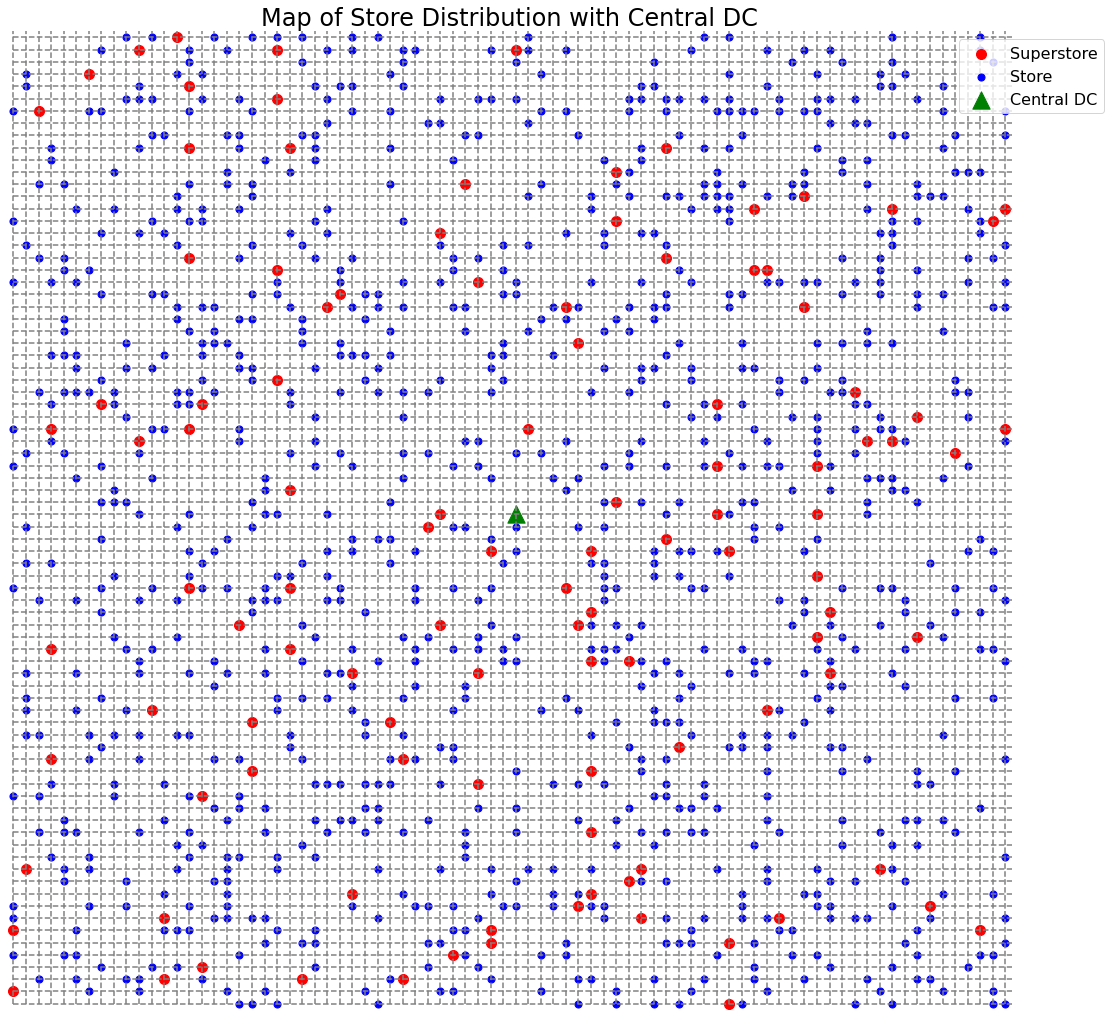

[46. 45. 68. 41. 46. 54. 29. 75. 55. 30. 52. 35. 61. 50. 60. 42. 50. 54.
 41. 32. 21. 32. 19. 70. 26. 43. 37. 30. 37. 35. 39. 28. 20. 25. 48. 53.
 60. 57. 69. 52. 46. 32. 33. 20. 70. 50. 56. 63. 51. 52. 21. 45. 25. 17.
 38. 45. 45. 67. 33. 54. 54.  5. 42. 32. 24. 38. 66. 48. 57. 53. 39.  6.
 37. 30. 40. 40. 54. 73. 62. 64. 13. 26. 48. 25. 32. 43. 63. 74. 45. 13.
 34. 36. 29. 75. 61. 44. 19. 46. 31. 53. 45. 30. 65. 47. 38. 52. 18. 50.
 29. 25. 23. 56. 43. 22. 32. 45. 51. 35. 36. 52. 27. 52. 34. 22. 46. 57.
 47. 79. 40. 18. 61. 59. 66. 29. 56. 32. 45. 39. 39. 54. 26. 49. 19. 42.
 39. 34. 38. 60. 61. 59. 46. 62. 59. 27. 37. 39. 14. 21. 48. 74. 63. 25.
 51. 37. 28. 40. 43. 14. 10. 76. 64. 24. 37. 57. 29. 51. 38. 34. 17. 41.
 68. 51. 26. 33. 16. 41. 39. 44. 60. 48. 59. 67. 37. 41. 63. 56. 53. 34.
 48. 19. 39. 57. 18. 42. 32. 54. 36. 43. 44. 24. 30. 35. 47. 50. 40. 31.
 12. 42. 45. 40. 68. 46. 26. 12. 23. 63. 40. 47. 54. 22. 45. 49. 60. 16.
 37. 62. 36. 46. 38. 51. 35. 53. 55. 30. 38. 43. 64

In [2]:
import json
import numpy as np
from gurobipy import*
import matplotlib.pyplot as plt
import random
import copy

M0 = 20
N0 = 40
prob0 = 0.5
N2 = 500
lb = 1e8
y1 = []
S1 = []
i0 = 110
j0 = 990
lamb0 = 440
res_prime = 99999
res_prime_list = list()
y_prime = list()
S_prime = list()
res_dual = 99999
res_dual_list = list()
y_dual = list()
S_dual = list()
zd = 0
zp = 0
time0 = 0
time1 = 0
std0 = 0
std1 = 0


def save_map_to_json(file_name, cdist2time, f, h, t, g):
    data = {
        'cdist2time': cdist2time.tolist(),
        'f': f.tolist(),
        'h': h.tolist(),
        't': t.tolist(),
        'g': g.tolist()
    }
    with open(file_name, 'w') as file:
        json.dump(data, file, indent=4)

cdist2time, f, h, t, g = MapGenerate(I=i0, J=j0, N=N2, lamb=lamb0, p=prob0)
save_map_to_json('LargeMapGenerateI110J990L440.json', cdist2time, f, h, t, g)

In [3]:
import json
import numpy as np

def load_map_from_json(file_name):
    with open(file_name, 'r') as file:
        data = json.load(file)
    
    cdist2time = np.array(data['cdist2time'])
    f = np.array(data['f'])
    h = np.array(data['h'])
    t = np.array(data['t'])
    g = np.array(data['g'])
    t = t/5
    
    return cdist2time, f, h, t, g

# Usage Example
file_name = 'LargeMapGenerateI110J990L440.json'
cdist2time, f, h, t, g = load_map_from_json(file_name)

In [4]:
import io
import sys

# Create a StringIO object to capture output
captured_output = io.StringIO()
sys.stdout = captured_output
def DataGenerate(I, J, N, lamb, p, f, h, t, g, cdist2time):
    
    open_low = 500
    open_high = 1500

    a_low = 100
    a_high = 300
    b_low = 10
    b_high = 20
    pl_low = 45
    pl_high = 150
    dc_low = 15
    dc_high = 50
    ni = range(I)
    nj = range(J)
    neta = range(N)
    
    ## define prob：1 days 0 hours
    prob = p
    w = np.random.rand(J,N)
    w[w>prob] = 1
    w[w<=prob] = 0 # generate waiting time


    c = np.zeros([J,N])
    c1 = np.random.randint(b_low, b_high+1, (J, N)) * cdist2time.reshape(J, 1) + np.random.randint(a_low, a_high+1, (J, N))
    c2 = np.repeat(cdist2time, N).reshape(J, N) * b_high + a_high
    c1 = c1/10
    c2 = c2/5

    
    for j in nj:
        for eta in neta:
            if w[j, eta] == 1:
                c[j, eta] = np.minimum(c1[j, eta], c2[j, eta])
            else:
                c[j, eta] = c2[j, eta]
    
    d = np.random.rand(J, N)
    poi = np.random.poisson(lam=lamb, size=N)
    poi[poi > J] = J
    for iters in range(N):
        index = np.argsort(d[:, iters].ravel())[:-poi[iters]:-1]
        d[:, iters] = np.zeros(J)
        d[index, iters] = 1
        
    t_p = np.zeros([I,J,N])
    c_p = np.zeros([J,N])
    for eta in neta:
        t_p[:,:,eta] = 1/N*t
    c_p = 1/N*c
    q = np.zeros([I,J,N])
    q0 = np.zeros([I,J,N])
    u = np.zeros([I,N])
    v = np.zeros([J,N])
    for i in ni:
        for j in nj:
            for eta in neta:
                q[i,j,eta] = u[i,eta] + t_p[i,j,eta]
    return c, d, c_p, t_p, q, q0, u, v
def Vascent(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, I, J, N):
    ni = range(I)
    nj = range(J)
    neta = range(N)

    # Sort q0 and initialize v
    for j in nj:
        for eta in neta:
            q0[:, j, eta] = np.sort(q[:, j, eta])
            if d[j, eta] != 0:
                v[j, eta] = q0[0, j, eta]

    # Calculate s
    s = np.zeros(I)
#     for i in ni:
#         dummy = 0
#         for j in nj:
#             for eta in neta:
#                 dummy += np.max([0, v[j, eta] - u[i, eta] - t_p[i, j, eta]])
#         s[i] = f[i] - dummy
    for i in ni:
        dummy = 0
        for j in nj:
            max_diff = np.maximum(0, v[j, :] - u[i, :] - t_p[i, j, :])
            dummy += np.sum(max_diff)
        s[i] = f[i] - dummy

    # Initialize k
    k = np.zeros([J, N])
    for j in nj:
        for eta in neta:
            k[j, eta] = np.min(np.argwhere(q0[:, j, eta] >= v[j, eta]))

    # Main optimization loop
    delta0 = 1
    while delta0 != 0:
        delta0 = 0
        for j in nj:
            for eta in neta:
                if d[j, eta] > 0 and (v[j, eta] < c_p[j, eta]):
                    delta = 9999
                    for i in ni:
                        if (v[j, eta] - u[i, eta] - t_p[i, j, eta] >= 0) and s[i] < delta:
                            delta = s[i]
                    if (delta > q0[int(k[j, eta] + 1), j, eta] - v[j, eta]) or (delta > c_p[j, eta] - v[j, eta]):
                        if q0[int(k[j, eta] + 1), j, eta] > c_p[j, eta]:
                            delta = c_p[j, eta] - v[j, eta]
                        else:
                            delta = q0[int(k[j, eta] + 1), j, eta] - v[j, eta]
                            k[j, eta] += 1
                        delta0 = 1
                        for i in ni:
                            if v[j, eta] - u[i, eta] - t_p[i, j, eta] >= 0:
                                s[i] -= delta
                        v[j, eta] += delta

    # Calculate zd
    zd = np.sum(d * v)
#     print(zd)

    return zd, f, h, g, t, c, d, t_p, c_p, q, q0, u, v, s

def Uascent(f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s, I, J, N):
    ni = range(I)
    nj = range(J)
    neta = range(N)
    for i in ni:
        num = np.sum(u[i,:])
        g[i] = h[i] - num
        q = t_p + u[:, np.newaxis,:]
        delta0 = -1
        while(delta0 != 0):
            delta0 = 0
            for j in nj:
                for eta in neta:
                    if v[j,eta] - q[i,j,eta] > 0:
    #                     print(i)
                        delta1 = v[j,eta] - q[i,j,eta]
                        delta1 = np.minimum(g[i],delta1)
                        u[i,eta] += delta1
                        g[i] -= delta1
    #                     print(g[i])
                        if g[i] > 0:
                            delta0 = 1
                        for j in nj:
                            if(v[j,eta] - q[i,j,eta]>0):
                                s[i] += delta1
                            q[i,j,eta] += delta1
                        break
    return f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s
def SAA_initial(c, d, f, h, t, n1, I, J, lamb):
    m = Model('SAA example')
    N = n1

    m.update()
    ni = range(I)
    nj = range(J)
    neta = range(n1)
    x = {}
    for i in ni:
        for j in nj:
            for eta in neta:
                x[i, j, eta] = m.addVar(vtype=GRB.BINARY, name="x_%d_%d_%d" % (i, j, eta))
    y = {}
    for i in ni:
        y[i] = m.addVar(vtype=GRB.BINARY, name="y_%d" % (i))
    z = {}
    for j in nj:
        for eta in neta:
            z[j, eta] = m.addVar(vtype=GRB.BINARY, name="z_%d_%d" % (j, eta))
    S = {}
    for i in ni:
        S[i] = m.addVar(vtype=GRB.INTEGER, name='S_%d' % i)

    m.setObjective(quicksum(f[i] * y[i] for i in ni) + quicksum(h[i] * S[i] for i in ni) + 1 / N *
                   quicksum(
                       quicksum(quicksum(t[i, j] * x[i, j, eta] for i in ni) + c[j, eta] * z[j, eta] for j in nj) for
                       eta in neta), GRB.MINIMIZE)

    for i in ni:
        for eta in neta:
            m.addConstr(quicksum(x[i, j, eta] for j in nj) <= S[i])
    for j in nj:
        for eta in neta:
            m.addConstr(quicksum(x[i, j, eta] for i in ni) + z[j, eta] >= d[j, eta])
    for i in ni:
        for j in nj:
            for eta in neta:
                m.addConstr(x[i, j, eta] <= y[i])


    m.optimize()
    
    y_value = np.zeros(I)
    S_value = np.zeros(I)

#     print("y")
#     for i in ni:
#         print(y[i])
#     print("S")
#     for i in ni:
#         print(S[i])
    for i in ni:
        y_value[i] = y[i].x
        S_value[i] = S[i].x
    lb = m.objVal

    return y_value, S_value, lb 
def SAA_res(c, d, f, h, t, n2, I, J, lamb, y, S):

    m = Model('bound')
    m.update()

    N = n2

    ni = range(I)
    nj = range(J)
    neta = range(N)
    neta = range(N)

    x = {}
    for i in ni:
        for j in nj:
            for eta in neta:
                x[i, j, eta] = m.addVar(vtype=GRB.BINARY, name="x_%d_%d_%d" % (i, j, eta))
    z = {}
    for j in nj:
        for eta in neta:
            z[j, eta] = m.addVar(vtype=GRB.BINARY, name="z_%d_%d" % (j, eta))

    m.setObjective(quicksum(f[i] * y[i] for i in ni) + quicksum(h[i] * S[i] for i in ni) + 1 / N *
                   quicksum(
                       quicksum(quicksum(t[i, j] * x[i, j, eta] for i in ni) + c[j, eta] * z[j, eta] for j in nj) for
                       eta in neta), GRB.MINIMIZE)

    for i in ni:
        for eta in neta:
            m.addConstr(quicksum(x[i, j, eta] for j in nj) <= S[i])
    for j in nj:
        for eta in neta:
            m.addConstr(quicksum(x[i, j, eta] for i in ni) + z[j, eta] >= d[j, eta])
    for i in ni:
        for j in nj:
            for eta in neta:
                m.addConstr(x[i, j, eta] <= y[i])
    m.optimize()
    ub = m.objVal

    return ub

In [5]:
def SAA_dual(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, i0, j0, N):
    zd, f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s = Vascent(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, I=i0, J=j0, N=N0)
    f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s = Uascent(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, s, I=i0, J=j0, N=N0)
    zd, f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s = Vascent(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, I=i0, J=j0, N=N0)
    f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s = Uascent(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, s, I=i0, J=j0, N=N0)
    zd, f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s = Vascent(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, I=i0, J=j0, N=N0)
    f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s = Uascent(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, s, I=i0, J=j0, N=N0)
    zd, f, h, g, t, c, d,t_p, c_p, q, q0, u, v, s = Vascent(f, h, g, t, c, d, t_p, c_p, q, q0, u, v, I=i0, J=j0, N=N0)
    I = i0
    J = j0
    N = N0
    ni = range(I)
    nj = range(J)
    neta = range(N)
    istar = []

    for i in ni:
        if s[i] <= 0.001*f[i]:
            istar.append(i)
    iplus = set()
    for j in nj:
        for eta in neta:
            B = set()
            io = -1
            sumi = 999
            for i in istar:
                if t_p[i,j,eta] + u[i,eta] <= v[j,eta]:
                    B.add(i)
                    if(t_p[i,j,eta] + u[i,eta] < sumi):
                        io = i
                        sumi = t_p[i,j,eta] + u[i,eta]
            if(len(B) == 0):
                continue
            elif(len(B) == 1):
                iplus.add(io)
            elif not B.isdisjoint(iplus):
                iplus.add(io)
    listi = list(iplus)
    x = np.zeros([I, J, N])
    S = np.zeros(I)
    s = np.zeros([I, N])
    for j in nj:
        for eta in neta:
            if (d[j,eta] != 1 or v[j,eta] <= 8):
                break
            num = 0
            i_p = -1
            target = 999
            for i in listi:
                if S[i] > s[i,eta] and t_p[i,j,eta] < target:
                    num += 1
                    i_p = i
                    target = t_p[i,j,eta]
            if num > 0:
                s[i_p,eta] += 1
            else:
                sum0 = 999
                for i in listi:
                    if t_p[i,j,eta] + u[i,eta] < sum0:
                        sum0 = t_p[i,j,eta] + u[i,eta]
                        i_p = i
                if i_p != -1:
    #                 x[i_p,j,eta] = 1
                    s[i_p,eta] += 1
                    if s[i_p,eta] > S[i_p]:
                        S[i_p] = s[i_p,eta]
    y = np.zeros(I)
    z = np.zeros([J,N])

    for i in listi:
        y[i] = 1
    for j in nj:
        for eta in neta:
            if v[j,eta] == c_p[j,eta]:
                z[j,eta] = 1
    x = np.zeros([I, J, N])    
    def ipp(t_p, u, j, eta):
        maxvalue = 99999
        tempi = -1
        for i in listi:
            if t_p[i,j,eta] + u[i,eta] < maxvalue:
                tempi = i
        return tempi

    for j in nj:
        for eta in neta:
            i = ipp(t_p, u, j, eta)
            if c_p[j,eta] > v[j,eta]+0.1 and v[j,eta] > 0.1:
                x[i,j,eta] = 1

    res = 0
    res += np.sum(f[:]*y[:]+h[:]*S[:])  
    res += 1/N*np.sum(c[:,:]*z[:,:])  
    for eta in neta:
        res += np.sum(1/N*t[:,:]*x[:,:,eta])
    print(res)
    return zd, res, y.copy(), S.copy()
# res


In [6]:
import numpy as np
from gurobipy import*
import matplotlib.pyplot as plt
import random
def save_results_to_txt(file_name, time0, time1, y_prime, y_dual, S_prime, S_dual, y_prime_list, y_dual_list, S_prime_list, S_dual_list, t_prime_list, t_dual_list):
    with open(file_name, 'w') as file:
        # 写入res_dual相关信息
        file.write(f"time_prime: {time1}\n")
        file.write(f"time_dual: {time0}\n")
#         file.write(f"res_prime: {res_prime}\n")
#         file.write(f"res_dual: {res_dual}\n")
        file.write(f"y_prime: {y_prime}\n")
        file.write(f"y_dual: {y_dual}\n")
        file.write(f"S_prime: {S_prime}\n")
        file.write(f"S_dual: {S_dual}\n")
        
#         file.write(f"res_prime_mean: {np.mean(res_prime_list)}\n")
#         file.write(f"res_dual_mean: {np.mean(res_dual_list)}\n")
        file.write(f"y_prime_mean: {np.mean(y_prime_list)}\n")
        file.write(f"y_dual_mean: {np.mean(y_dual_list)}\n")
        file.write(f"S_prime_mean: {np.mean(S_prime_list)}\n")
        file.write(f"S_dual_mean: {np.mean(S_dual_list)}\n")
        
        file.write(f"t_prime_mean: {np.mean(t_prime_list)}\n")
        file.write(f"t_prime_max: {np.max(t_prime_list)}\n")
        file.write(f"t_prime_min: {np.min(t_prime_list)}\n")
        file.write(f"t_prime: {t_prime_list}\n")
        
        file.write(f"t_dual_mean: {np.mean(t_dual_list)}\n")
        file.write(f"t_dual_max: {np.max(t_dual_list)}\n")
        file.write(f"t_dual_min: {np.min(t_dual_list)}\n")
        file.write(f"t_dual: {t_dual_list}\n")

In [7]:
import time
import copy

M0 = 20
N0 = 40
prob0 = 0.5
N2 = 500
lb = 1e8
y1 = []
S1 = []
i0 = 110
j0 = 990
lamb0 = 660


# res_prime = 99999
# res_prime_list = list()
y_prime_list = list()
S_prime_list = list()
t_prime_list = list()

# res_dual = 99999
# res_dual_list = list()
y_dual_list = list()
S_dual_list = list()
t_dual_list = list()



y_prime = 0
S_prime = 0
y_dual = 0
S_dual = 0
time0 = 0
time1 = 0

c_test, d_test, c_p_test, t_p_test, q_test, q0_test, u_test, v_test = DataGenerate(i0, j0, N2, lamb0, prob0, f, h, t, g, cdist2time)
for ii in range(M0):
    print(ii)
    c_1, d_1, c_p_1, t_p_1, q_1, q0_1, u_1, v_1 = DataGenerate(i0, j0, N0, lamb0, prob0, f, h, t, g, cdist2time)
    start_time0 = time.perf_counter()
    (zd0, zp0, y0, S0) = SAA_dual(f, h, g, t, c_1, d_1, t_p_1, c_p_1, q_1, q0_1, u_1, v_1, i0, j0, N0)
    end_time0 = time.perf_counter()
    time0 += end_time0-start_time0
    start_time1 = time.perf_counter()
    (y1, S1, _)= SAA_initial(c_1, d_1, f, h, t, n1=N0, I=i0, J=j0, lamb=lamb0)
    end_time1 = time.perf_counter()
    time1 += end_time1-start_time1
#     res0 = SAA_res(c_test, d_test, f, h, t, N2, i0, j0, lamb0, y0, S0)
#     res_dual_list.append(res0)
    y_dual_list.append(y0)
    S_dual_list.append(S0)
    t_dual_list.append(end_time0-start_time0)
#     res1 = SAA_res(c_test, d_test, f, h, t, N2, i0, j0, lamb0, y1, S1)
#     res_prime_list.append(res1)
    y_prime_list.append(y1)
    S_prime_list.append(S1)
    t_prime_list.append(end_time1-start_time1)
#     y_prime_list.append(1)
#     S_prime_list.append(1)
#     t_prime_list.append(1)
#     if res0 < res_dual:
#         res_dual = res0
#         y_dual = y0
#         S_dual = S0
#         zd = zd0
#         zp = zp0
#     if res1 < res_prime:
#         res_prime = res1
#         y_prime = y1
#         S_prime = S1
save_results_to_txt("LargeN40resI110J1100L660.txt",time0, time1, y_prime, y_dual, S_prime, S_dual, y_prime_list, y_dual_list, S_prime_list, S_dual_list, t_prime_list, t_dual_list)

In [8]:
import time
import copy

M0 = 20
N0 = 40
prob0 = 0.5
N2 = 500
lb = 1e8
y1 = []
S1 = []
i0 = 110
j0 = 990
lamb0 = 440


# res_prime = 99999
# res_prime_list = list()
y_prime_list = list()
S_prime_list = list()
t_prime_list = list()

# res_dual = 99999
# res_dual_list = list()
y_dual_list = list()
S_dual_list = list()
t_dual_list = list()



y_prime = 0
S_prime = 0
y_dual = 0
S_dual = 0
time0 = 0
time1 = 0

c_test, d_test, c_p_test, t_p_test, q_test, q0_test, u_test, v_test = DataGenerate(i0, j0, N2, lamb0, prob0, f, h, t, g, cdist2time)
for ii in range(M0):
    print(ii)
    c_1, d_1, c_p_1, t_p_1, q_1, q0_1, u_1, v_1 = DataGenerate(i0, j0, N0, lamb0, prob0, f, h, t, g, cdist2time)
    start_time0 = time.perf_counter()
    (zd0, zp0, y0, S0) = SAA_dual(f, h, g, t, c_1, d_1, t_p_1, c_p_1, q_1, q0_1, u_1, v_1, i0, j0, N0)
    end_time0 = time.perf_counter()
    time0 += end_time0-start_time0
    start_time1 = time.perf_counter()
    (y1, S1, _)= SAA_initial(c_1, d_1, f, h, t, n1=N0, I=i0, J=j0, lamb=lamb0)
    end_time1 = time.perf_counter()
    time1 += end_time1-start_time1
#     res0 = SAA_res(c_test, d_test, f, h, t, N2, i0, j0, lamb0, y0, S0)
#     res_dual_list.append(res0)
    y_dual_list.append(y0)
    S_dual_list.append(S0)
    t_dual_list.append(end_time0-start_time0)
#     res1 = SAA_res(c_test, d_test, f, h, t, N2, i0, j0, lamb0, y1, S1)
#     res_prime_list.append(res1)
    y_prime_list.append(y1)
    S_prime_list.append(S1)
    t_prime_list.append(end_time1-start_time1)
#     if res0 < res_dual:
#         res_dual = res0
#         y_dual = y0
#         S_dual = S0
#         zd = zd0
#         zp = zp0
#     if res1 < res_prime:
#         res_prime = res1
#         y_prime = y1
#         S_prime = S1
save_results_to_txt("LargeN40resI110J1100L440.txt",time0, time1, y_prime, y_dual, S_prime, S_dual, y_prime_list, y_dual_list, S_prime_list, S_dual_list, t_prime_list, t_dual_list)

In [9]:
import time
import copy

M0 = 20
N0 = 40
prob0 = 0.5
N2 = 500
lb = 1e8
y1 = []
S1 = []
i0 = 110
j0 = 990
lamb0 = 220


# res_prime = 99999
# res_prime_list = list()
y_prime_list = list()
S_prime_list = list()
t_prime_list = list()

# res_dual = 99999
# res_dual_list = list()
y_dual_list = list()
S_dual_list = list()
t_dual_list = list()



y_prime = 0
S_prime = 0
y_dual = 0
S_dual = 0
time0 = 0
time1 = 0

c_test, d_test, c_p_test, t_p_test, q_test, q0_test, u_test, v_test = DataGenerate(i0, j0, N2, lamb0, prob0, f, h, t, g, cdist2time)
for ii in range(M0):
    print(ii)
    c_1, d_1, c_p_1, t_p_1, q_1, q0_1, u_1, v_1 = DataGenerate(i0, j0, N0, lamb0, prob0, f, h, t, g, cdist2time)
    start_time0 = time.perf_counter()
    (zd0, zp0, y0, S0) = SAA_dual(f, h, g, t, c_1, d_1, t_p_1, c_p_1, q_1, q0_1, u_1, v_1, i0, j0, N0)
    end_time0 = time.perf_counter()
    time0 += end_time0-start_time0
    start_time1 = time.perf_counter()
    (y1, S1, _)= SAA_initial(c_1, d_1, f, h, t, n1=N0, I=i0, J=j0, lamb=lamb0)
    end_time1 = time.perf_counter()
    time1 += end_time1-start_time1
#     res0 = SAA_res(c_test, d_test, f, h, t, N2, i0, j0, lamb0, y0, S0)
#     res_dual_list.append(res0)
    y_dual_list.append(y0)
    S_dual_list.append(S0)
    t_dual_list.append(end_time0-start_time0)
#     res1 = SAA_res(c_test, d_test, f, h, t, N2, i0, j0, lamb0, y1, S1)
#     res_prime_list.append(res1)
    y_prime_list.append(y1)
    S_prime_list.append(S1)
    t_prime_list.append(end_time1-start_time1)
#     if res0 < res_dual:
#         res_dual = res0
#         y_dual = y0
#         S_dual = S0
#         zd = zd0
#         zp = zp0
#     if res1 < res_prime:
#         res_prime = res1
#         y_prime = y1
#         S_prime = S1
save_results_to_txt("LargeN40resI110J1100L220.txt",time0, time1, y_prime, y_dual, S_prime, S_dual, y_prime_list, y_dual_list, S_prime_list, S_dual_list, t_prime_list, t_dual_list)